In [1]:
from __future__ import print_function
from __future__ import division

import cv2
import numpy as np

from timeit import default_timer as tmr # timer for performance check

In [226]:
%matplotlib inline
# %matplotlib notebook

from PIL import Image
import PIL.ImageOps

import matplotlib
from matplotlib import pyplot as plt
from matplotlib.pyplot import imshow

matplotlib.rcParams['figure.figsize'] = [25, 20] # [6.0, 4.0]

def imdiv(im, d0,s0,d1,s1, win=None):
    if win is not None:
        im=im.copy()
        (y0,x0),(y1,x1) = win
        h, w = y1 - y0, x1 - x0
#         cv2.rectangle(im, *win, np.max(im))
        im[y0:y1, x0] = im[y0:y1, x1] = im[y0, x0:x1] = im[y1, x0:x1] = np.max(im)
    l0, l1 = map(len, (im, im[0]))
    return im[int(l0//d0*s0):int(l0//d0*(s0+1)), int(l1//d1*s1):int(l1//d1*(s1+1))]

from IPython import display
from IPython.display import HTML, display as ddisplay

def imshow_now(im, msg=''):
    plt.imshow(im)
    display.clear_output(wait=True)
    ddisplay(plt.gcf())
    return input(msg)
#     plt.waitforbuttonpress()

def display_array_table(obj, imsize=None, force_col=None):
    if force_col and force_col>0:
        o, line=[], []
        i=0
        for l in obj:
            for c in l:
                line.append(c)
                i+=1
                if i>0 and i % force_col == 0:
                    o.append(line)
                    line = []
        obj = o
#         print(o)
    def html_format_obj(o):
        from base64 import b64encode
        from io import BytesIO
        t = type(o)
        if t is np.ndarray or issubclass(t, Image.Image):
            if t is np.ndarray: o = Image.fromarray(o)
            buf = BytesIO()
            if imsize: o = o.resize(imsize)
            o.save(buf, format='PNG')
            o = '<img src="data:image/png;base64, %s" />' % b64encode(buf.getvalue()).decode()
        return str(o)
    html = '<table><tr>{}</tr></table>'.format(
            '</tr><tr>'.join(
                '<td style="text-align:center;">{}</td>'.format('</td><td style="text-align:center;">'.join(html_format_obj(v) for v in row)) for row in obj)
            )
#     print(html)
    ddisplay(HTML(html))

In [242]:
from keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
print(x_train.shape, y_train.shape)
# imshow(x_test[0])
# print(y_test[0])
l = []
for i in range(len(x_train)):
    l.append((x_train[i], y_train[i]))
display_array_table(l[:100], force_col=2*15) # 15 sets per row

(60000, 28, 28) (60000,)


,5,,0,,4,,1,,9,,2,,1,,3,,1,,4,,3,,5,,3,,6,,1
,7,,2,,8,,6,,9,,4,,0,,9,,1,,1,,2,,4,,3,,2,,7
,3,,8,,6,,9,,0,,5,,6,,0,,7,,6,,1,,8,,7,,9,,3
,9,,8,,5,,9,,3,,3,,0,,7,,4,,9,,8,,0,,9,,4,,1
,4,,4,,6,,0,,4,,5,,6,,1,,0,,0,,1,,7,,1,,6,,3
,0,,2,,1,,1,,7,,9,,0,,2,,6,,7,,8,,3,,9,,0,,4


In [283]:
# np.savetxt('mnist.csv', [str(x_train[0]), y_train[0]], '%s', delimiter=',')
def save_set(name, x, y):
    list(map(lambda s, v : np.save(name+'_'+s+'.npy', v), ('x','y'), (x,y)))
def load_set(name):
    return list(map(lambda s: np.load(name+'_'+s+'.npy'), ('x', 'y')))


5


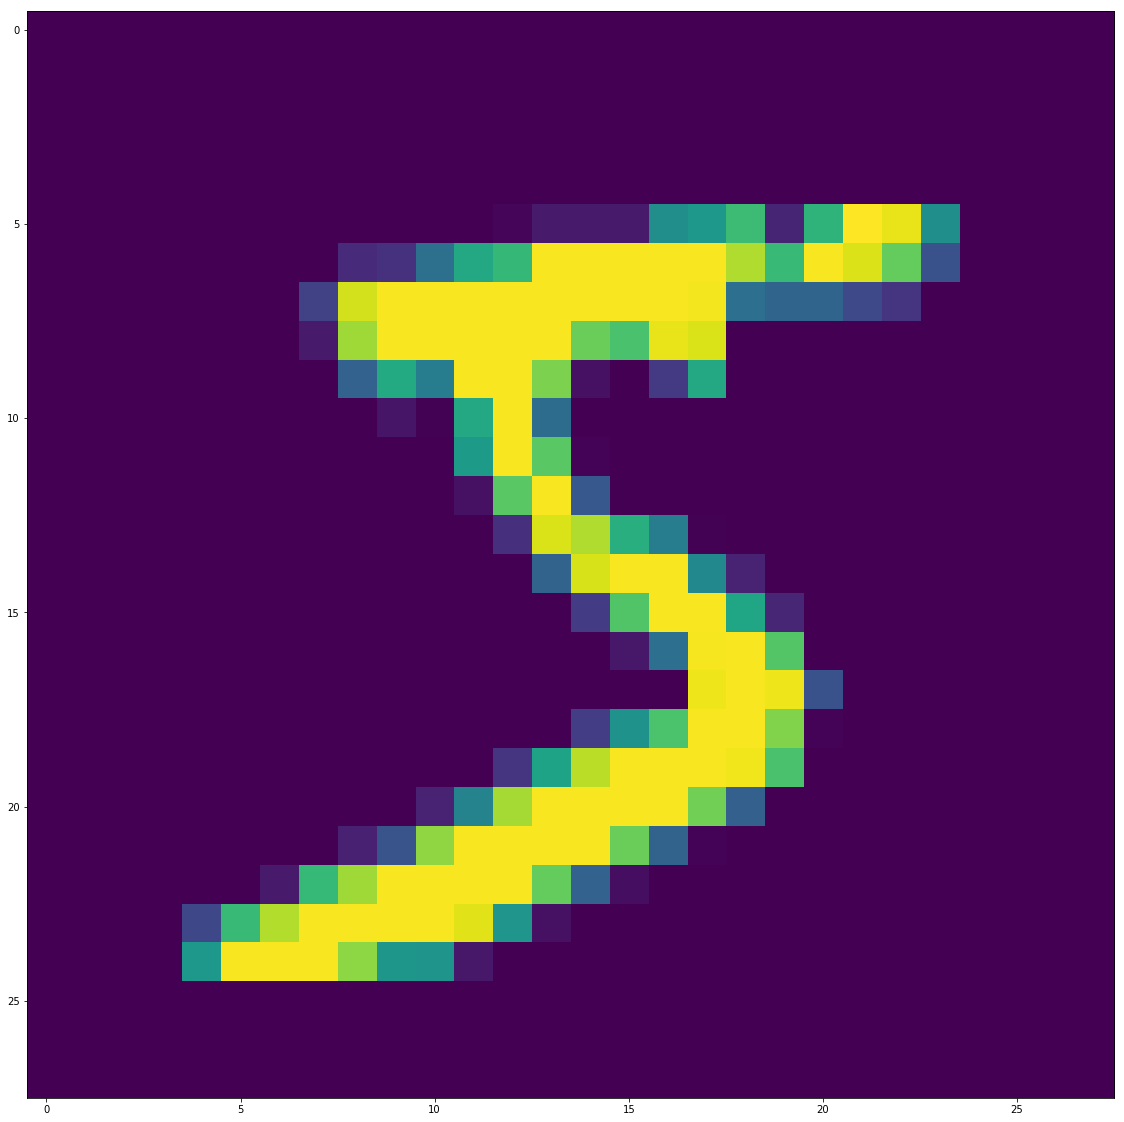

In [284]:
# np.loadtxt('mnist.csv', 'str', delimiter=',')[-1]
# imshow(np.load('mnist_x.npy')[0])
# print(np.load('mnist_y.npy')[0,0,0])

# save_set('mnist', x_train, y_train)
x_train, y_train = load_set('mnist')
imshow(x_train[0])
print(y_train[0,0,0])

In [156]:
for i in range(len(x_train)):
    if not (x_train[i] in x_test): print(i)